# Import libraries

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Import data

In [2]:
data = pd.read_csv(os.getcwd()+'\\data\\concrete_data.csv')
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Exploring the data

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000         

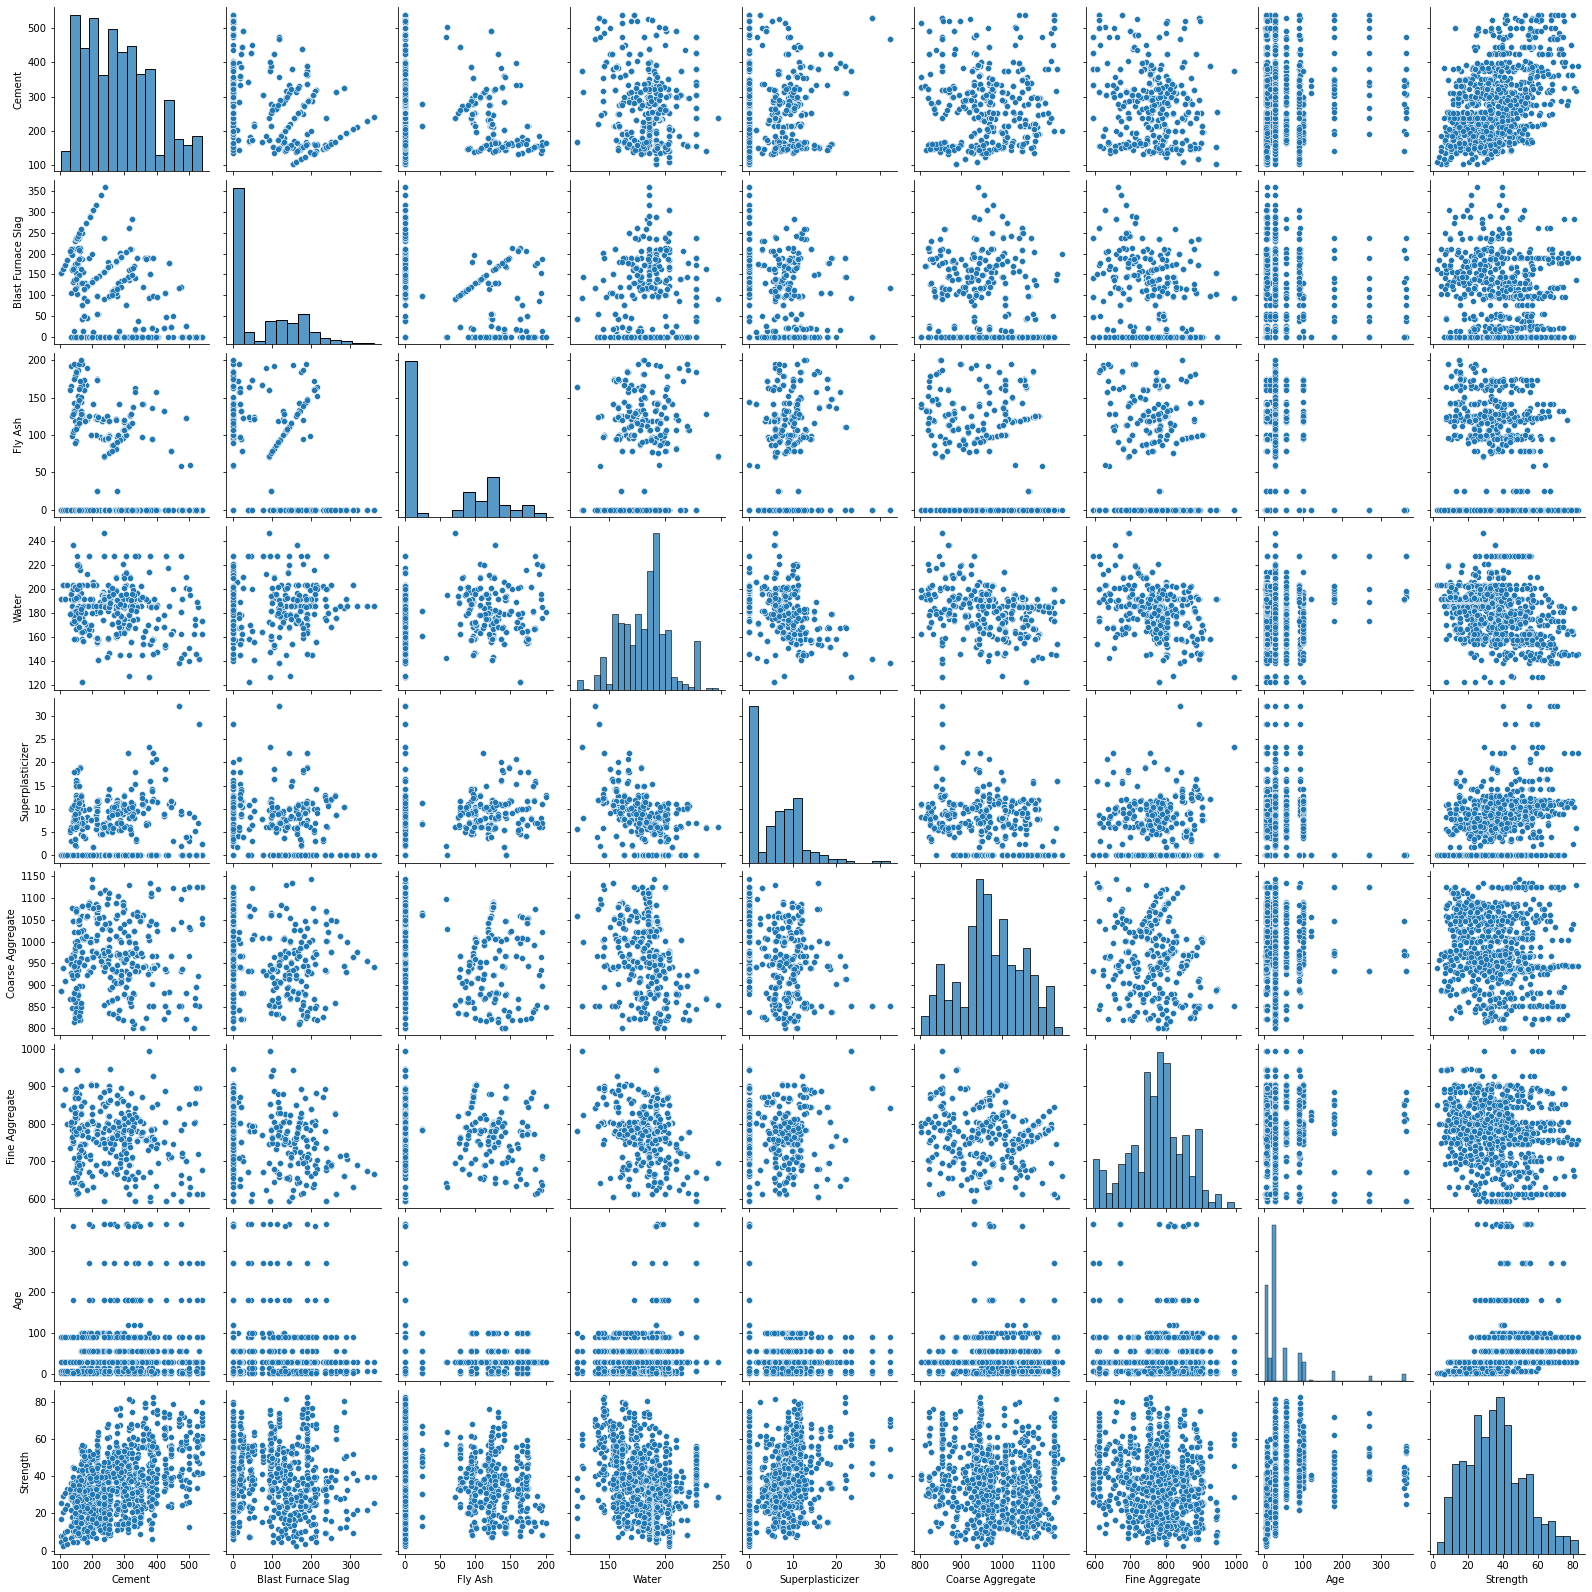

In [4]:
sns.pairplot(data)

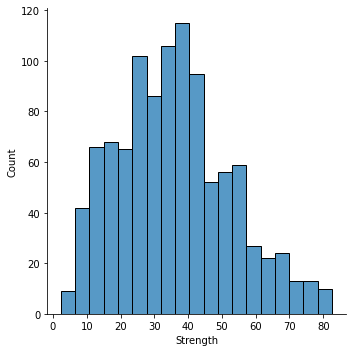

In [5]:
sns.displot(y)

<AxesSubplot:>

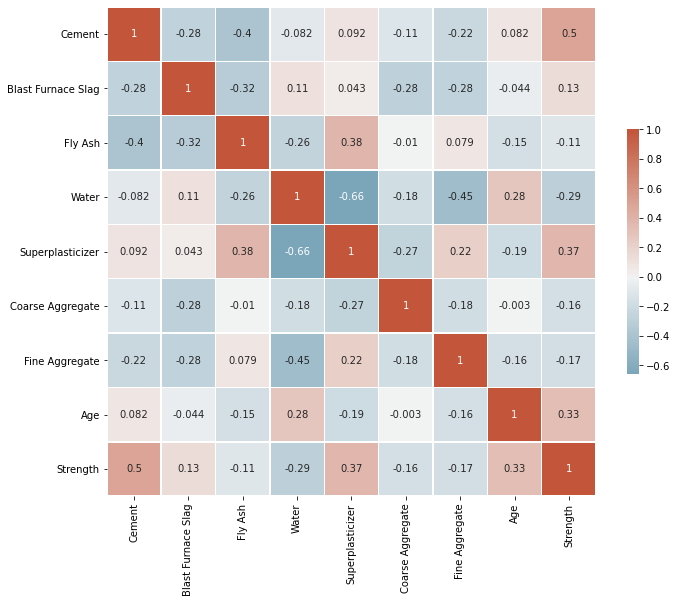

In [6]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data.corr(),  cmap=cmap, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Using GridSearchCV to try the parameters
 ### Round 1

In [7]:
param_grid1 = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [1, 1.5, 2],
    'reg_lambda': [0, 1, 5]
}
optimal_params1 = GridSearchCV(
                        estimator=xgb.XGBRegressor( objective='reg:squarederror',
                                                    colsample_bytree=0.9,
                                                    n_estimators=200,
                                                    random_state=42),
                        param_grid=param_grid1,
                        scoring=['r2', 'neg_root_mean_squared_error'],
                        refit='r2',
                        cv=4)

In [8]:
optimal_params1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.9,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=200, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [9]:
params1 = pd.DataFrame(optimal_params1.cv_results_)
params1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_reg_lambda,params,split0_test_r2,...,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.044374,0.008146,0.003890,7.256136e-04,1,0.01,2,0,"{'gamma': 1, 'learning_rate': 0.01, 'max_depth...",0.587687,...,0.590967,0.012255,73,-11.666498,-10.577926,-10.576731,-9.992736,-10.703473,0.605060,73
1,0.034159,0.001087,0.002992,1.976862e-07,1,0.01,2,1,"{'gamma': 1, 'learning_rate': 0.01, 'max_depth...",0.580920,...,0.585156,0.014582,76,-11.761851,-10.611884,-10.641941,-10.097042,-10.778179,0.607819,76
2,0.035157,0.001634,0.003182,4.762025e-04,1,0.01,2,5,"{'gamma': 1, 'learning_rate': 0.01, 'max_depth...",0.562119,...,0.566406,0.016250,79,-12.022783,-10.850349,-10.854283,-10.345701,-11.018279,0.615728,79
3,0.050615,0.001633,0.004623,6.626234e-04,1,0.01,3,0,"{'gamma': 1, 'learning_rate': 0.01, 'max_depth...",0.686569,...,0.692491,0.017207,61,-10.171805,-8.931382,-9.232416,-8.768920,-9.276131,0.543198,61
4,0.049617,0.002940,0.003491,4.994297e-04,1,0.01,3,1,"{'gamma': 1, 'learning_rate': 0.01, 'max_depth...",0.675882,...,0.681568,0.018198,64,-10.343770,-9.059842,-9.444377,-8.909492,-9.439371,0.557399,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.050129,0.002743,0.003331,4.480895e-04,2,0.1,3,1,"{'gamma': 2, 'learning_rate': 0.1, 'max_depth'...",0.909705,...,0.908940,0.008491,10,-5.459587,-4.741072,-5.043986,-4.912511,-5.039289,0.265367,10
77,0.048372,0.000867,0.003989,1.976862e-07,2,0.1,3,5,"{'gamma': 2, 'learning_rate': 0.1, 'max_depth'...",0.911735,...,0.907232,0.003885,16,-5.397863,-5.117678,-5.247950,-4.623892,-5.096846,0.290501,17
78,0.060839,0.000708,0.003332,5.774654e-04,2,0.1,4,0,"{'gamma': 2, 'learning_rate': 0.1, 'max_depth'...",0.917093,...,0.910733,0.006213,5,-5.231465,-4.875631,-5.071797,-4.783332,-4.990556,0.173772,5
79,0.060339,0.000499,0.003989,1.379947e-06,2,0.1,4,1,"{'gamma': 2, 'learning_rate': 0.1, 'max_depth'...",0.915056,...,0.910891,0.007599,4,-5.295322,-4.775660,-5.297080,-4.592429,-4.990123,0.312859,4


In [10]:
optimal_params1.best_params_

{'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 5}

In [11]:
pd.DataFrame(params1.iloc[optimal_params1.best_index_])

,53
mean_fit_time,0.060339
std_fit_time,0.00205698
mean_score_time,0.00351685
std_score_time,0.00052595
param_gamma,1.5
param_learning_rate,0.1
param_max_depth,4
param_reg_lambda,5
params,"{'gamma': 1.5, 'learning_rate': 0.1, 'max_dept..."
split0_test_r2,0.920762


## Because learning_rate, max_depth, and reg_lambda were at the end of their range, we continue to explore

### Round 2

In [12]:
param_grid2 = {
    'learning_rate': [0.1, 0.2, 0.3, 0.5],
    'max_depth': [4, 6, 8],
    'reg_lambda': [5, 7, 9]
}
optimal_params2 = GridSearchCV(
                        estimator=xgb.XGBRegressor( objective='reg:squarederror',
                                                    colsample_bytree=0.9,
                                                    n_estimators=200,
                                                    random_state=42),
                        param_grid=param_grid2,
                        scoring=['r2', 'neg_root_mean_squared_error'],
                        refit='r2',
                        cv=3)

In [13]:
optimal_params2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.9,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=200, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [14]:
params2 = pd.DataFrame(optimal_params2.cv_results_)
params2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_reg_lambda,params,split0_test_r2,split1_test_r2,split2_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.063164,0.005421,0.003657,4.702466e-04,0.1,4,5,"{'learning_rate': 0.1, 'max_depth': 4, 'reg_la...",0.901652,0.931321,0.900568,0.911180,0.014249,3,-5.514235,-4.531752,-4.839787,-4.961925,0.410290,3
1,0.059814,0.000036,0.003657,4.701903e-04,0.1,4,7,"{'learning_rate': 0.1, 'max_depth': 4, 'reg_la...",0.898086,0.931130,0.902253,0.910490,0.014694,4,-5.613302,-4.538045,-4.798595,-4.983314,0.457992,4
2,0.057847,0.002152,0.003662,4.736096e-04,0.1,4,9,"{'learning_rate': 0.1, 'max_depth': 4, 'reg_la...",0.893019,0.927191,0.907997,0.909402,0.013986,5,-5.751169,-4.666014,-4.655477,-5.024220,0.514049,5
3,0.095744,0.004953,0.005382,9.879787e-04,0.1,6,5,"{'learning_rate': 0.1, 'max_depth': 6, 'reg_la...",0.895764,0.924388,0.905813,0.908655,0.011857,11,-5.676897,-4.755000,-4.710419,-5.047439,0.445466,12
4,0.122236,0.020430,0.007136,1.432883e-03,0.1,6,7,"{'learning_rate': 0.1, 'max_depth': 6, 'reg_la...",0.895474,0.923665,0.908681,0.909273,0.011516,6,-5.684780,-4.777678,-4.638131,-5.033530,0.464014,6
5,0.090429,0.001699,0.004566,8.155696e-04,0.1,6,9,"{'learning_rate': 0.1, 'max_depth': 6, 'reg_la...",0.888107,0.926006,0.911520,0.908544,0.015615,12,-5.881718,-4.703860,-4.565463,-5.050347,0.590577,13
6,0.119680,0.004309,0.004654,4.702465e-04,0.1,8,5,"{'learning_rate': 0.1, 'max_depth': 8, 'reg_la...",0.896067,0.916922,0.906384,0.906458,0.008514,15,-5.668632,-4.984241,-4.696110,-5.116327,0.407868,15
7,0.135970,0.010845,0.005651,4.695161e-04,0.1,8,7,"{'learning_rate': 0.1, 'max_depth': 8, 'reg_la...",0.889959,0.921052,0.906074,0.905695,0.012697,17,-5.832832,-4.858746,-4.703881,-5.131820,0.499706,17
8,0.127769,0.014742,0.004657,9.389228e-04,0.1,8,9,"{'learning_rate': 0.1, 'max_depth': 8, 'reg_la...",0.887117,0.920860,0.913765,0.907247,0.014526,14,-5.907658,-4.864680,-4.507172,-5.093170,0.594136,14
9,0.058843,0.000814,0.003989,6.836514e-07,0.2,4,5,"{'learning_rate': 0.2, 'max_depth': 4, 'reg_la...",0.900492,0.928085,0.896770,0.908449,0.013968,13,-5.546665,-4.637291,-4.931363,-5.038440,0.378892,10


In [15]:
optimal_params2.best_params_

{'learning_rate': 0.3, 'max_depth': 4, 'reg_lambda': 7}

In [16]:
pd.DataFrame(params2.iloc[optimal_params2.best_index_])

,19
mean_fit_time,0.0611875
std_fit_time,0.00203443
mean_score_time,0.00365694
std_score_time,0.000469909
param_learning_rate,0.3
param_max_depth,4
param_reg_lambda,7
params,"{'learning_rate': 0.3, 'max_depth': 4, 'reg_la..."
split0_test_r2,0.902777
split1_test_r2,0.929281


# Model with the best parameters

In [17]:
model = xgb.XGBRegressor(objective='reg:squarederror',
                         colsample_bytree=0.9,
                         n_estimators=200,
                         learning_rate=0.3,
                         max_depth=4,
                         reg_lambda=7,
                         random_state=42)

In [18]:
model.fit(X_train,
          y_train,
          verbose=True,
          early_stopping_rounds=10,
          eval_metric='rmse',
          eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:28.96490
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:22.23327
[2]	validation_0-rmse:16.91843
[3]	validation_0-rmse:13.41618
[4]	validation_0-rmse:11.09754
[5]	validation_0-rmse:9.55412
[6]	validation_0-rmse:8.53834
[7]	validation_0-rmse:7.69725
[8]	validation_0-rmse:7.23991
[9]	validation_0-rmse:6.93166
[10]	validation_0-rmse:6.63160
[11]	validation_0-rmse:6.42957
[12]	validation_0-rmse:6.24460
[13]	validation_0-rmse:6.06113
[14]	validation_0-rmse:5.94414
[15]	validation_0-rmse:5.83391
[16]	validation_0-rmse:5.73944
[17]	validation_0-rmse:5.65212
[18]	validation_0-rmse:5.60902
[19]	validation_0-rmse:5.47342
[20]	validation_0-rmse:5.42255
[21]	validation_0-rmse:5.37207
[22]	validation_0-rmse:5.34437
[23]	validation_0-rmse:5.27837
[24]	validation_0-rmse:5.27297
[25]	validation_0-rmse:5.26112
[26]	validation_0-rmse:5.20210
[27]	validation_0-rmse:5.16876
[28]	validation_0-rmse:5.13307
[29]	validation_0-rmse:5.09285
[30]	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=7, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
preds = model.predict(X_test)

# Plotting results

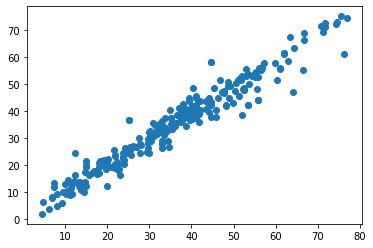

In [20]:
plt.scatter(y_test, preds)

In [21]:
residuals = y_test - preds

(array([ 2.,  1.,  2.,  0.,  0.,  1.,  0.,  4.,  6., 11., 13., 19., 39.,
        45., 35., 20., 16., 17.,  6.,  5.,  5.,  2.,  1.,  0.,  3.,  2.,
         1.,  0.,  1.,  1.]),
 array([-13.60796402, -12.59150907, -11.57505412, -10.55859917,
         -9.54214422,  -8.52568926,  -7.50923431,  -6.49277936,
         -5.47632441,  -4.45986946,  -3.44341451,  -2.42695956,
         -1.41050461,  -0.39404966,   0.62240529,   1.63886024,
          2.6553152 ,   3.67177015,   4.6882251 ,   5.70468005,
          6.721135  ,   7.73758995,   8.7540449 ,   9.77049985,
         10.7869548 ,  11.80340975,  12.81986471,  13.83631966,
         14.85277461,  15.86922956,  16.88568451]),
 <BarContainer object of 30 artists>)

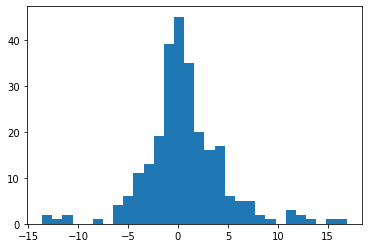

In [22]:
plt.hist(residuals, bins=30)